In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("ds701-fa24-midterm.ipynb")

# NBA Shot Data Midterm Challenge

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

if not os.path.exists("./datasets"):
    os.makedirs("./datasets")
    os.system("unzip ./archive.zip -d ./datasets")

datasets = sorted(os.listdir("./../datasets"))
print(datasets)

['.DS_Store', 'cleaned_data.csv', 'cleaned_test.csv', 'data.csv', 'submission.csv', 'test.csv', 'train.csv']


You have the following datasets in the ./datasets directory:

* train.csv
* test.csv

For questions 1, 2, and 4, work with the `train.csv` file. Use both `train.csv` and `test.csv` for question 3 (the prediction task).

## Part 1: Exploratory analysis, visualization and outlier detection.


Please answer the following seven questions.

In [4]:
df = pd.read_csv("./../datasets/train.csv")

<!-- BEGIN QUESTION -->

### Question 1-1: Unique Players

How many unique players are there? Return this value as an integer.

In [4]:
def find_n_unique_players(df):
    """
    Find and return the number of unique players as an integer.
    """
    return df["PLAYER_NAME"].nunique()

n_unique_players = find_n_unique_players(df)
print("Number of unique players", n_unique_players)

Number of unique players 2156


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-2: Played most games

Which player has played in the most games normalized by number of games per season (82) played in the dataset? 

Return a Pandas Series with an index of ['PLAYER_NAME', 'GAME_COUNT', 'GAMES_PER_SEASON'].

In [6]:
def find_top_player_most_games(df):
    """
    Find and return the player with the most games normalized by number of games per season (82) played in the dataset.
    """
    game_counts = df['PLAYER_NAME'].value_counts()
    
    games_per_season = game_counts / 82
    
    results = pd.DataFrame({
        'GAME_COUNT': game_counts,
        'GAMES_PER_SEASON': games_per_season
    })
    
    player = results.loc[results['GAMES_PER_SEASON'].idxmax()]

    max_player = pd.Series({
        'PLAYER_NAME': player.name,
        'GAME_COUNT': player['GAME_COUNT'],
        'GAMES_PER_SEASON': player['GAMES_PER_SEASON']
    })

    return max_player

top_player = find_top_player_most_games(df)
print(f"Player with the most games normalized by seasons: {top_player['PLAYER_NAME']} with {top_player['GAMES_PER_SEASON']} games per season")
print(top_player)

Player with the most games normalized by seasons: LeBron James with 284.4146341463415 games per season
PLAYER_NAME         LeBron James
GAME_COUNT               23322.0
GAMES_PER_SEASON      284.414634
dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-3: Highest Shot Players

Find the 10 players with the highest shot success rate in the 4th quarter that have taken at least 2000 shots in the 4th quarter. 

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'SHOT_COUNT'  
- 'SHOTS_MADE' 
- 'SHOT_SUCCESS_RATE'

In [7]:
def find_top_10_players_q4(df):
    """
    Find and return the 10 players with the highest shot success rate in the 4th quarter that have taken at least 2000 shots in the 4th quarter.
    """
    
    df4 = df[df['QUARTER'] == 4]
    shot_stats = df4.groupby('PLAYER_NAME').agg(SHOT_COUNT=('SHOT_MADE', 'size'),SHOTS_MADE=('SHOT_MADE', 'sum')).reset_index()
    
    shot_stats['SHOT_SUCCESS_RATE'] = shot_stats['SHOTS_MADE'] / shot_stats['SHOT_COUNT']
    shot_stats2000 = shot_stats[shot_stats['SHOT_COUNT'] >= 2000]
    top_players = shot_stats2000.nlargest(10, 'SHOT_SUCCESS_RATE')
    
    result_df = top_players[['PLAYER_NAME', 'SHOT_COUNT', 'SHOTS_MADE', 'SHOT_SUCCESS_RATE']]
    return result_df
    


top_players_q4 = find_top_10_players_q4(df)
#print(top_players_q4)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-4: Most shots made

Find the 10 players with the most SHOT_MADE beyond 23 feet of the basket who played in more than 500 games.

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'GAME_COUNT'  
- 'SHOTS_MADE_BEYOND_23'

In [8]:
def find_top_players_beyond_23_feet(df):
    """
    Find and return the 10 players with the most SHOT_MADE beyond 23 feet of the basket who played in more than 500 games.
    """
    # filter data on SHOT_MADE == TRUE beyond SHOT_DISTANCE > 23.0
    df23 = df[(df["SHOT_MADE"] == True) & (df["SHOT_DISTANCE"]>23.0)]
    
    #create stats for each player
    #game count is stats for each player that calculates the number of unique game id for each player name 
    #it must be (total number) of played games so we use the oriignal df
    games_count = df.groupby('PLAYER_NAME')['GAME_ID'].nunique().reset_index(name='GAME_COUNT')
    #shots_made_count is a count of shots made beyond 23 feet for each unique player, but only those who made the shot from that distance, therefore we use the df23
    shots_made_count = df23.groupby('PLAYER_NAME')['SHOT_MADE'].count().reset_index(name='SHOTS_MADE_BEYOND_23')
    
    #merge those stats on the player name 
    merged_df = pd.merge(games_count, shots_made_count, on='PLAYER_NAME')
    
    #filter those who played in more than 500 games
    games500_df = merged_df[merged_df['GAME_COUNT'] > 500]
    #show only top 10
    top_players = games500_df.nlargest(10, 'SHOTS_MADE_BEYOND_23')
    result_df = top_players[['PLAYER_NAME', 'GAME_COUNT', 'SHOTS_MADE_BEYOND_23']]
    
    return result_df
    

top_players_beyond_23 = find_top_players_beyond_23_feet(df)
print(top_players_beyond_23)

         PLAYER_NAME  GAME_COUNT  SHOTS_MADE_BEYOND_23
1620   Stephen Curry        1219                  2643
761     James Harden        1333                  2193
364   Damian Lillard        1088                  1993
1111    LeBron James        1950                  1754
1063   Klay Thompson         996                  1590
1036    Kevin Durant        1380                  1543
1083      Kyle Lowry        1345                  1516
1404     Paul George        1086                  1471
557      Eric Gordon        1056                  1458
1081     Kyle Korver        1351                  1455


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-5: Close shots made

Find the 10 players with the most SHOT_MADE within 10 feet of the basket who played in more than 500 games.

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'GAME_COUNT'  
- 'SHOTS_MADE_INSIDE_10'


In [10]:
def find_top_players_within_10_feet(df):
    """
    Find and return the 10 players with the most SHOT_MADE within 10 feet of the basket who played in more than 500 games.
    """
    df10 = df[(df["SHOT_MADE"]==True) & (df["SHOT_DISTANCE"]<10)]
    
    games_count = df.groupby("PLAYER_NAME")["GAME_ID"].nunique().reset_index(name='GAME_COUNT')
    shots_count = df10.groupby("PLAYER_NAME")["SHOT_MADE"].sum().reset_index(name="SHOTS_MADE_INSIDE_10")
    merged_df = pd.merge(games_count, shots_count, on='PLAYER_NAME')
    
    games500_df = merged_df[merged_df['GAME_COUNT'] > 500]
    
    top_players = games500_df.nlargest(10, 'SHOTS_MADE_INSIDE_10')
    result_df = top_players[['PLAYER_NAME', 'GAME_COUNT', 'SHOTS_MADE_INSIDE_10']]
    
    return result_df

top_players_below_10 = find_top_players_within_10_feet(df)
print(top_players_below_10)

                PLAYER_NAME  GAME_COUNT  SHOTS_MADE_INSIDE_10
1240           LeBron James        1950                  7370
587           Dwight Howard        1437                  5373
694   Giannis Antetokounmpo        1022                  4255
1700      Russell Westbrook        1500                  4169
589             Dwyane Wade        1350                  4160
2034          Zach Randolph        1231                  3948
1851         Thaddeus Young        1328                  3809
1566              Pau Gasol        1237                  3735
111           Anthony Davis         945                  3592
275         Carmelo Anthony        1619                  3571


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-6: Shot Types

For each position, find the 2 most successful types of action taken during a shot (ACTION_TYPE). 

Return a dataframe with the columns:

- 'POSITION'                 
- 'ACTION_TYPE'  
- 'SUCCESSFUL_SHOTS'

In [12]:
def find_top_actions_by_position(df):
    """
    Find and return the 2 most successful types of action taken during a shot for each position.
    """
    successful_shots = df[df["SHOT_MADE"] == True]
    action_counts = successful_shots.groupby(['POSITION', 'ACTION_TYPE']).size().reset_index(name='SUCCESSFUL_SHOTS')
    
    action_counts['RANK'] = action_counts.groupby('POSITION')['SUCCESSFUL_SHOTS'].rank(method='first', ascending=False)
    top_actions = action_counts[action_counts['RANK'] <= 2].drop(columns='RANK')
    
    return top_actions.reset_index(drop=True)

top_actions_by_position = find_top_actions_by_position(df)
print(top_actions_by_position)

    POSITION                 ACTION_TYPE  SUCCESSFUL_SHOTS
0          C                   Jump Shot             59814
1          C                  Layup Shot             45622
2       C-PF                   Jump Shot               699
3       C-PF                  Layup Shot               438
4         PF                   Jump Shot            106647
5         PF                  Layup Shot             42812
6       PF-C                   Jump Shot               841
7       PF-C                  Layup Shot               406
8      PF-SF                   Jump Shot              1312
9      PF-SF                  Layup Shot               333
10        PG          Driving Layup Shot             47075
11        PG                   Jump Shot            114409
12     PG-SF          Driving Layup Shot                27
13     PG-SF                   Jump Shot               183
14     PG-SG          Driving Layup Shot               647
15     PG-SG                   Jump Shot              18

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-7: Additional Insight

One more insight of your choice. You can, for example, create a statistic that represents how **clutch** a player is. For example, how many shots they make in the last 4 minutes of the 4th quarter. You can of course choose something different, and this does not have to be at the player level - could be team-level instead. 

A dataframe showing the players' names and the number of successful shots they have made, along with the number of teams they have played for. The players are sorted by the number of successful shots in descending order.

In [18]:
# return top 10 players with the highest number of shots made (total) that played in more than 3 teams

def find_top_players_multiple_teams(df):
    """
    Find the top 10 players with highest number of shots made who have played for more than 3 teams.
    """
     
    team_counts = df.groupby('PLAYER_NAME')['TEAM_NAME'].nunique().reset_index(name='TEAM_COUNT')

    players3teams = team_counts[team_counts['TEAM_COUNT'] > 3]
    
    shots_made = df[df['SHOT_MADE'] == True].groupby('PLAYER_NAME').size().reset_index(name='SHOTS_MADE')
    
    merged_df = pd.merge(players3teams, shots_made, on='PLAYER_NAME')

    top_players = merged_df.sort_values(by='SHOTS_MADE', ascending=False).head(10)
    
    return top_players.reset_index(drop=True)

top_players_multiple_teams = find_top_players_multiple_teams(df)
print(top_players_multiple_teams)


         PLAYER_NAME  TEAM_COUNT  SHOTS_MADE
0    Carmelo Anthony           6        8079
1       Kevin Durant           5        8005
2  Russell Westbrook           5        7265
3         Chris Paul           8        6343
4       James Harden           5        6103
5        Joe Johnson           7        5805
6      Zach Randolph           5        5689
7      Dwight Howard           7        5632
8          Pau Gasol           5        5436
9           Rudy Gay           5        5367


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2: Clustering for Player Profiles



Create player profiles based on attributes like (not limited to these):

- Shot types (SHOT_TYPE, ACTION_TYPE).
- Shot zones (BASIC_ZONE, ZONE_NAME).
- Shot success rate (SHOT_MADE).
- Shot distance (SHOT_DISTANCE).

Consider subsets of years to make the clustering faster:

- 2012-2016
- 2016-2020
- 2020-2024

Based on the metric results, pick a k-value and plot centroids over these three 4-year periods and analyze - how do the clusters change? 

Add some additional analysis based on the players included in the cluster. Does the cluster have a common trait or explanation? Can you explain outliers? Then, try to improve the silhouette score by experimenting with other features and/or dimensionality reduction techniques.

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [36]:
def profiles(df, start_year=2016, end_year=2020):
    
    df_filtered = df[(df['SEASON_1'] >= start_year) & (df['SEASON_1'] <= end_year)]
    profiles = df_filtered.groupby('PLAYER_NAME').agg(
        #TOTAL_SHOTS=('SHOT_MADE', 'size'),
        #SHOTS_MADE=('SHOT_MADE', 'sum'),
        SHOT_SUCCESS_RATE=('SHOT_MADE', 'mean'),
        AVERAGE_SHOT_DISTANCE=('SHOT_DISTANCE', 'mean'),
        AVG_QUARTER=('QUARTER', 'mean'),).reset_index()
    
    return profiles

profiles2016_2020 = profiles(df)
print(profiles2016_2020)

profiles2012_2016 = profiles(df, 2012, 2016)
print(profiles2012_2016)

profiles2020_2024 = profiles(df, 2020, 2024)
print(profiles2020_2024)


profiles2012_2024 = profiles(df, 2012, 2024)
print(profiles2012_2024)


         PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  AVG_QUARTER
0         AJ Hammons           0.406250              19.101293     3.187500
1       Aaron Brooks           0.405405              17.167330     2.822859
2       Aaron Gordon           0.447971              13.997612     2.286283
3     Aaron Harrison           0.220779              19.207097     3.077922
4      Aaron Holiday           0.424658              16.836351     2.721532
..               ...                ...                    ...          ...
931    Zaza Pachulia           0.504514               6.582198     2.160533
932     Zhaire Smith           0.384615              17.388054     2.718309
933          Zhou Qi           0.200000              18.005444     3.850000
934  Zion Williamson           0.594406               4.014374     2.513897
935   Zylan Cheatham           0.666667               5.222222     2.888889

[936 rows x 4 columns]
        PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  A

### Determining the Optimal Number of Clusters (k): 

To identify the most appropriate number of clusters (k) for player segmentation, I applied the Silhouette Score method. The silhouette score measures how similar an object is to its own cluster compared to other clusters, helping determine the best value of k that balances intra-cluster cohesion and inter-cluster separation. Based on the plots below, I found out that for each period, the ideal optimal k is 2, meanwhile for the whole dataset, the optimal k is 3.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.5446565971323151
Silhouette Score for k=3: 0.5184898934256127


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.524845399348177


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.5144949460769325


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.48747709362868225


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.4803531711987056


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.4757908532249538


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.4670589418727356


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.45922607315036446


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=11: 0.46124247916030087


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=12: 0.4513414119889864


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=13: 0.4354834564988566


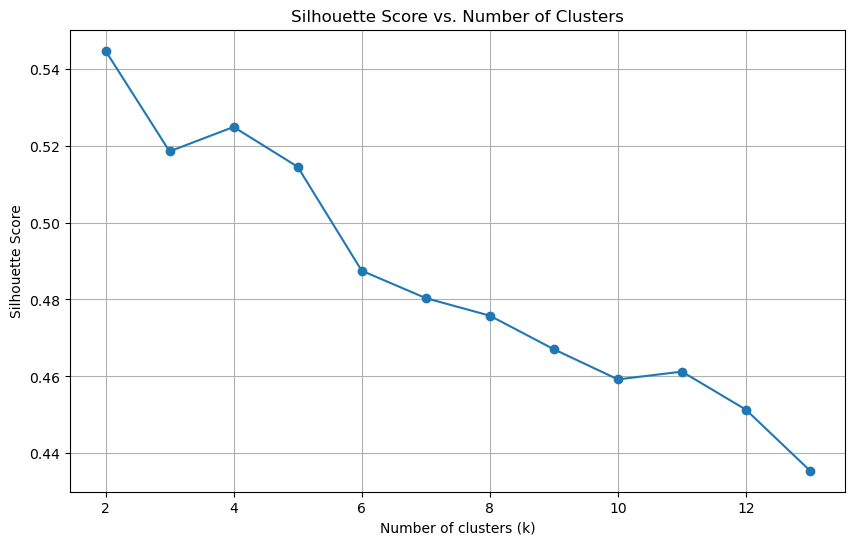

In [38]:
features = ['SHOT_SUCCESS_RATE', 'AVERAGE_SHOT_DISTANCE', 'AVG_QUARTER']

#feature matrix X with one-hot encoding for categorical features
X = profiles2020_2024[features]
k_values = range(2, 14)
s_scores = []

#compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    #calc silhouette score for current k
    score = silhouette_score(X, kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')
    s_scores.append(score)

#plot silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.5641108076582239
Silhouette Score for k=3: 0.5270905537184232


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.5340461069614977


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.5171374803537134


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.49861085642487923


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.4963463616852358


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.49695926991754136


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.4783467498526775


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.4791733043012733


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=11: 0.4665227349082416


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=12: 0.4494871380501713


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=13: 0.4492384572814581


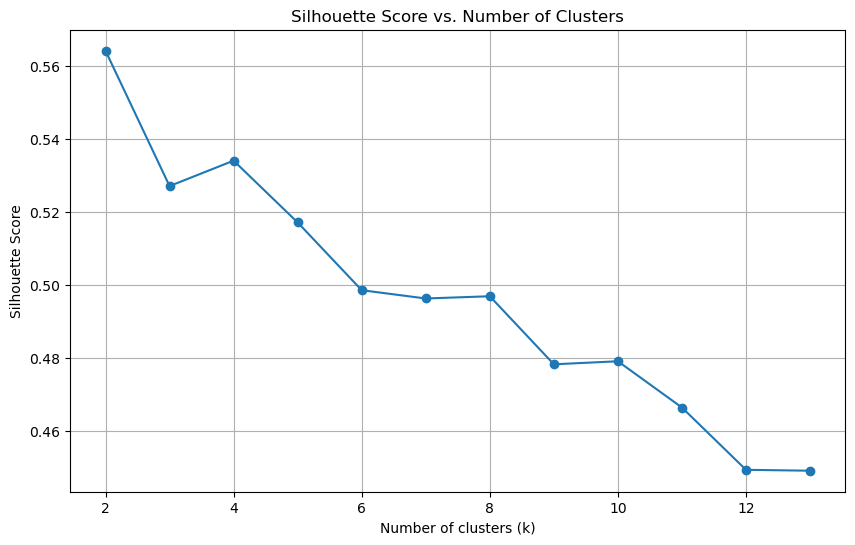

In [39]:
#feature matrix X with one-hot encoding for categorical features
X2 = profiles2016_2020[features]
k_values = range(2, 14)
s_scores = []

#compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    #calc silhouette score for current k
    score = silhouette_score(X2, kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')
    s_scores.append(score)

#plot silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.9579606593459837
Silhouette Score for k=3: 0.5937431693666584


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.5210384861781038


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.5125480401147059


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.5045101095753585


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.4873974679121524


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.4840187980707639


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.4785069334017933


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.4771466829873785


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=11: 0.4705180406947918


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=12: 0.45295854024431725


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=13: 0.44082887883278266


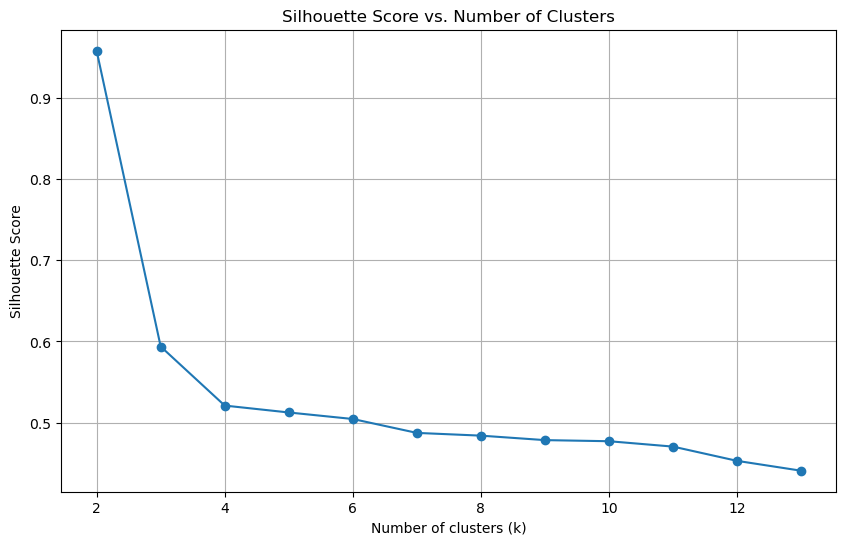

In [40]:
#feature matrix X with one-hot encoding for categorical features
X3 = profiles2012_2016[features]

k_values = range(2, 14)
s_scores = []

#compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    #calc silhouette score for current k
    score = silhouette_score(X3, kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')
    s_scores.append(score)

#plot silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.5518584593034946
Silhouette Score for k=3: 0.5639613961014702


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.5203370285022972


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.5161537933492727


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.507378390643702


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.49661099627829486


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.4811415173983801


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.47387271056520486


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.4521557381186907


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=11: 0.4656942324547363


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=12: 0.4540272987260831


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=13: 0.4387397736045218


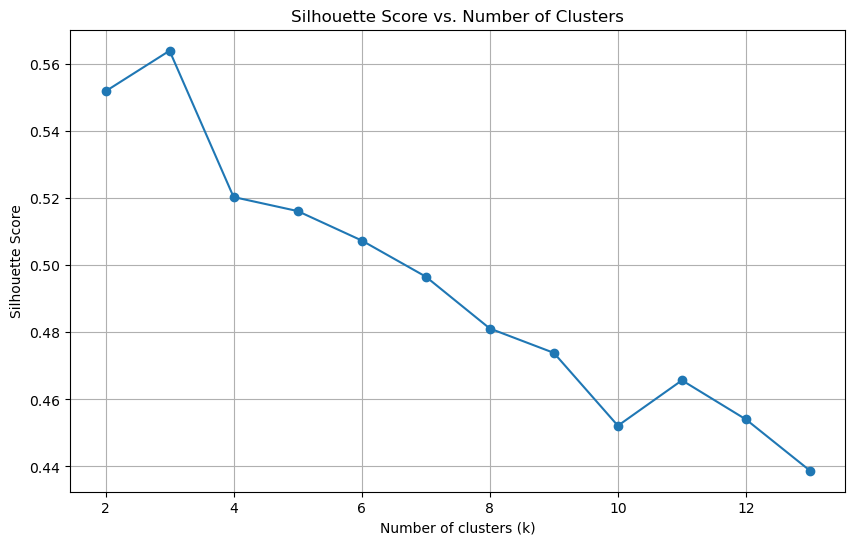

In [41]:

#feature matrix X with one-hot encoding for categorical features
X4 = profiles2012_2024[features]
k_values = range(2, 14)
s_scores = []

#compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X4)
    #calc silhouette score for current k
    score = silhouette_score(X4, kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')
    s_scores.append(score)

#plot silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


### Principal Component Analysis (PCA): 
After determining the optimal k, I used Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. PCA helped visualize the clusters in a lower-dimensional space while retaining the most significant variance within the data. 

## Analysis of the clustering

1. Shot Success Rate is improving overall across the clusters, with more players achieving above-average performance in the 2020-2024 period compared to the earlier periods.

2. Shot Distance is generally decreasing over time, reflecting a shift towards more efficient scoring strategies, particularly from the 2016-2024 period onward.

3. Average Quarter Played remains relatively stable across the years but increases slightly in some clusters, suggesting that player involvement is shifting more to key moments in the game as their roles develop.

## 2012-2016

#### Cluster 0:
- moderate to high shot success rate
- shot distances varying widely
- average shot distance ranging from mid-range (15-20 feet) to closer shots (around 4 feet) 
- players tend to take shots a little later in the game (average quarter 2.1 - 2.8)

Some players, such as Aaron Gray, show very high shot success rates despite short shot distances -> proficiency in close-range shots.

#### Cluster 1:
- lower shot success rates, particularly in the range of 20-30%
- Shot distances are generally longer (14-24 feet)
- Shots later in the game (average quarter 3-4)

The players here seem to take riskier or more difficult shots, and their lower success rates reflect this tendency.

## 2016-2020

#### Cluster 0:
- mix of moderate to high shot success rates and varying shot distances
- shot distances range from 10 to 25 feet
- players often shoot in the earlier parts of the game (average quarter 2.3- 3.2) 

Players in this cluster, such as Al Jefferson and Zach Randolph, appear to focus on mid-range shots with relatively high accuracy.

#### Cluster 1:
- players with relatively high shot success rates (majoprity has success rates above 40%)
- shorter shot distances
- players often shoot in the earlier quarters (around the 2nd and 3rd quarters)

The players in this group, such as Zion Williamson and Zaza Pachulia, typically focus on shorter, more efficient shots with high accuracy.


## 2020-2024

#### Cluster 0:
- high shot success rate
- shot distances vary between 10 to 18 feet (some players focusing on longer-range shots >20 feet)
- shots early in the game (average quarter from 2.5 to 2.7)

Players such as Zion Williamson and Zylan Cheatham show excellent shot accuracy, particularly on mid-range shots.

#### Cluster 1:
- lower shot success rates (often below 35%)
- and with varying shot distances (14-25 feet)
- shots in the later quarters, mostly in the 3rd or 4th quarters. 

The data suggests these players might be taking more difficult or less efficient shots. 


## Full Dataset: 2012-2024

#### Cluster 0:
- moderately high shot success rates (around 45%-55%) - highly efficient shooters
- shot distances range from 4 to 18 feet, 
- shots is early in the game (avg quarter 2.2 to 2.6) 

This cluster includes players who are generally proficient at shooting mid-range shots and perform well during the early stages of games.

#### Cluster 1:
- broader range of shot success rates - from low (around 20%) to moderate (35-45%)
- players with longer shot distances (up to 25 feet)
- tend to shoot more in the later quarters of the game (around quarter 2.7-3.2)

These players are possibly taking more difficult shots under pressure or in less optimal situations.

#### Cluster 2:
- moderate to low shot success rates, ranging from 14% to 43%. 
- Shot distances range from mid-range to longer shots
- shots late in the game (around quarters 3-4)

The combination of lower success rates and higher shot difficulty (longer distances and late-game shots) suggests these players may have a lower efficiency in shooting under pressure.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


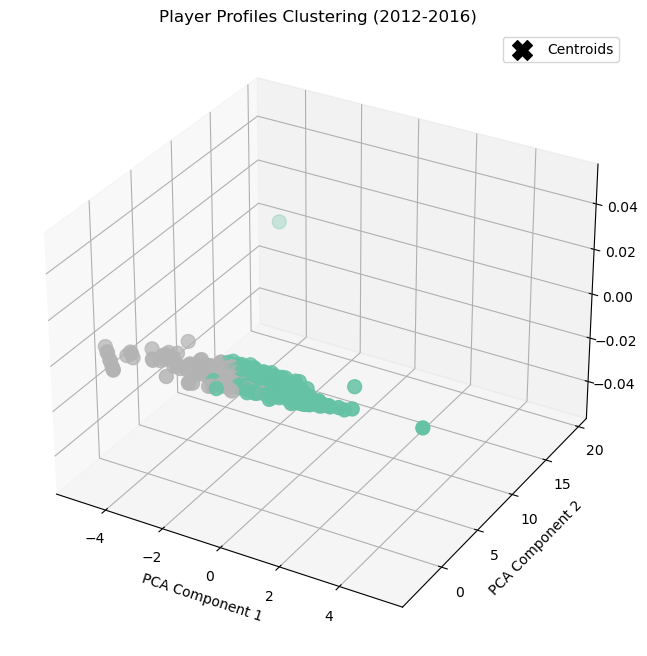

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


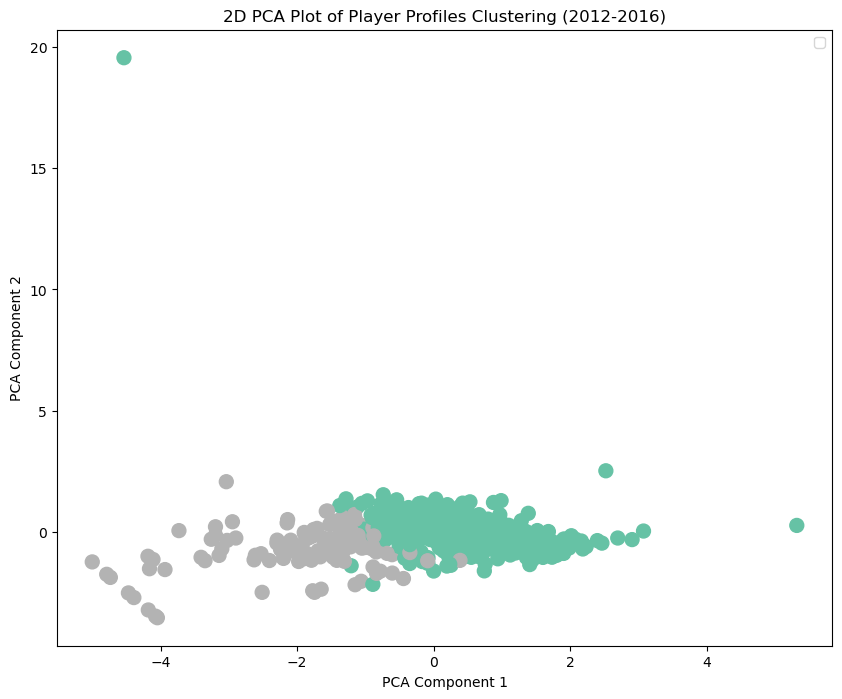

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (2012-2016):
        PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  AVG_QUARTER
0          AJ Price           0.376689              19.833406     2.809093
1      Aaron Brooks           0.409014              15.666449     2.702579
2      Aaron Gordon           0.457096              12.301150     2.377887
3        Aaron Gray           0.518072               4.477556     2.116441
5     Adonis Thomas           0.333333              15.777474     2.666667
..              ...                ...                    ...          ...
799    Xavier Henry           0.408233              12.970140     2.696300
800  Xavier Munford           0.403226              15.358338     2.725547
803     Zach LaVine           0.436641              15.483167     2.651906
804   Zach Randolph           0.469093              10.040614     2.374940
805   Zaza Pachulia           0.461238               7.152091     2.295110

[676 rows x 4 columns]


Cluster 1 (2012-2016):
        PLAYER_NAME  SHOT_SU

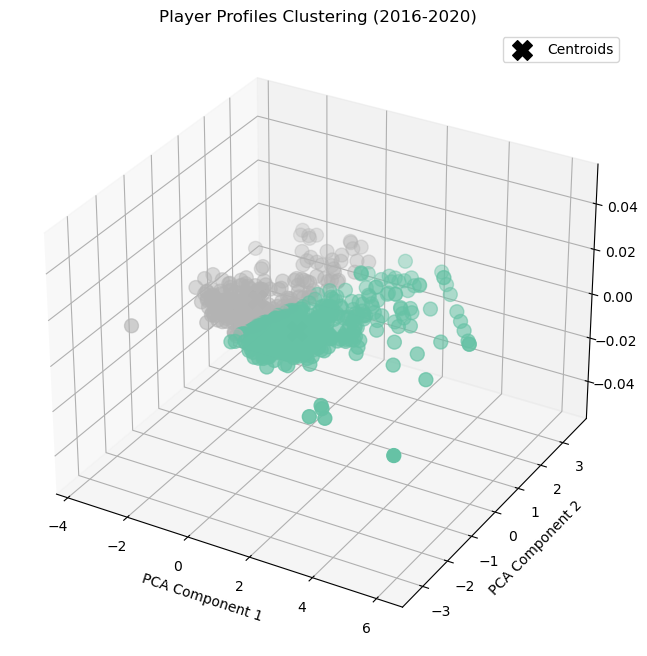

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


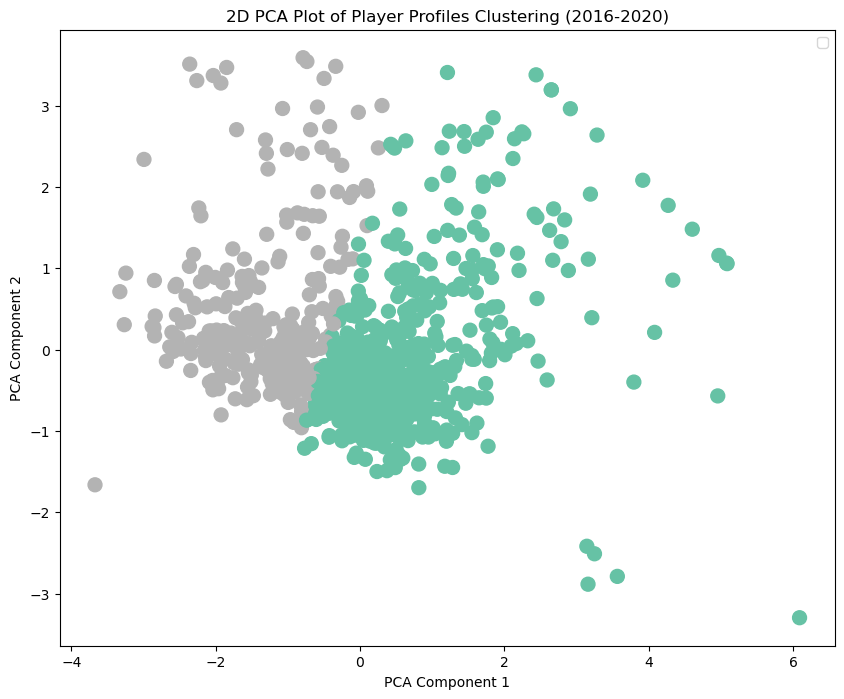

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (2016-2020):
          PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  AVG_QUARTER
0          AJ Hammons           0.406250              19.101293     3.187500
1        Aaron Brooks           0.405405              17.167330     2.822859
2        Aaron Gordon           0.447971              13.997612     2.286283
3      Aaron Harrison           0.220779              19.207097     3.077922
4       Aaron Holiday           0.424658              16.836351     2.721532
..                ...                ...                    ...          ...
927       Zach LaVine           0.450417              15.110715     2.584976
928       Zach Lofton           0.000000              25.000000     2.000000
929  Zach Norvell Jr.           0.333333              22.222222     2.666263
932      Zhaire Smith           0.384615              17.388054     2.718309
933           Zhou Qi           0.200000              18.005444     3.850000

[667 rows x 4 columns]


Cluster 1 (2016-2020):
    

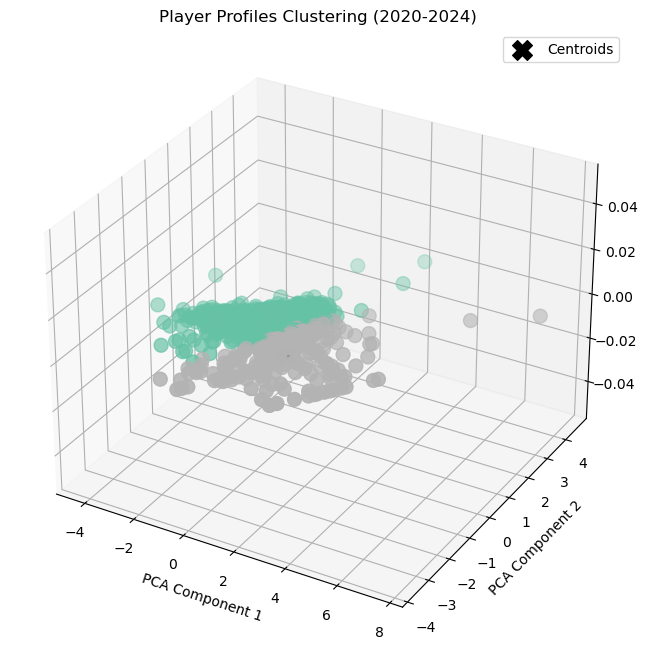

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


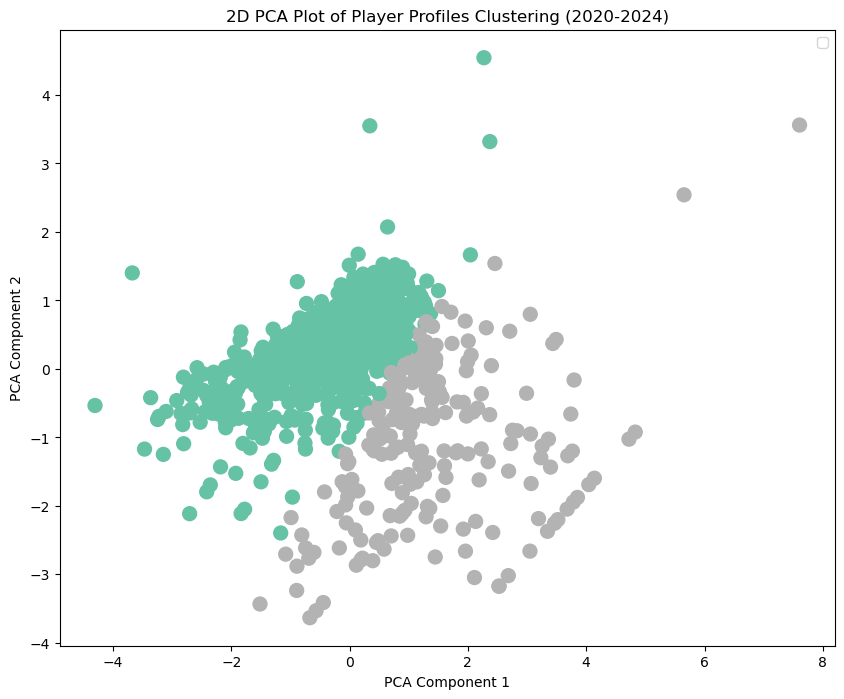

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (2020-2024):
         PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  AVG_QUARTER
2         AJ Griffin           0.452991              18.012038     2.617556
3       Aaron Gordon           0.513043              11.692848     2.271607
5      Aaron Holiday           0.431286              16.286300     2.602886
6      Aaron Nesmith           0.449843              17.325113     2.542273
7      Aaron Wiggins           0.525943              11.895370     2.602565
..               ...                ...                    ...          ...
954       Zeke Nnaji           0.524490              11.400914     2.712214
955     Zhaire Smith           0.333333               9.222222     2.888889
956  Ziaire Williams           0.423221              16.833126     2.531799
957  Zion Williamson           0.605877               5.140195     2.518574
958   Zylan Cheatham           0.545455               6.454545     3.000000

[747 rows x 4 columns]


Cluster 1 (2020-2024):
        PLAYER_N

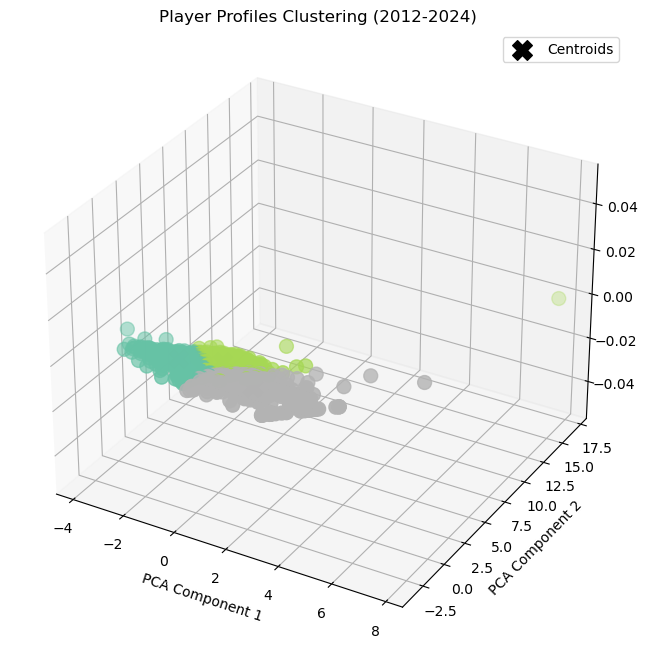

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


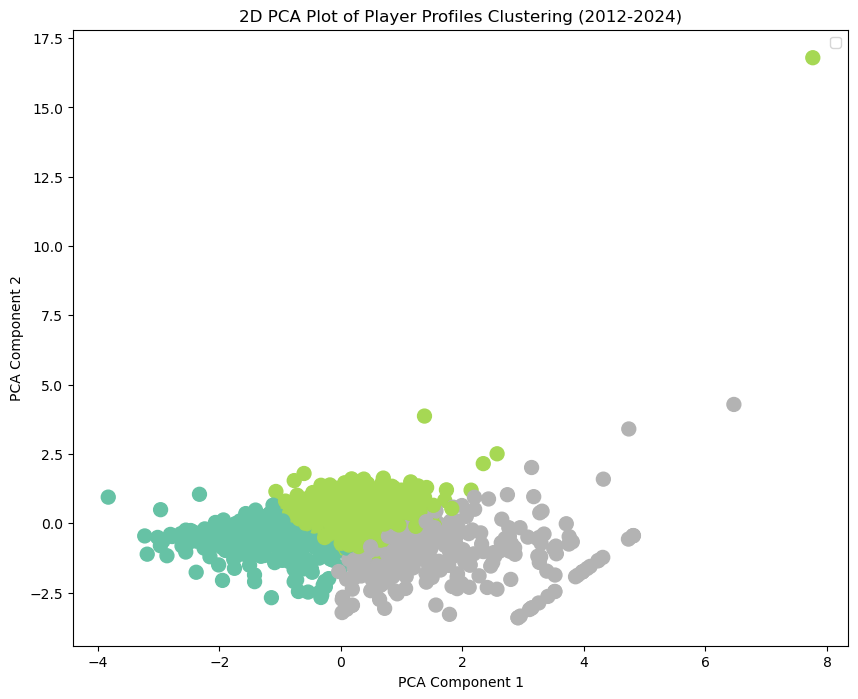

Cluster 0 (2012-2024):
          PLAYER_NAME  SHOT_SUCCESS_RATE  AVERAGE_SHOT_DISTANCE  AVG_QUARTER
6        Aaron Gordon           0.482662              12.732269     2.285807
7          Aaron Gray           0.518072               4.477556     2.116441
13      Aaron Wiggins           0.525943              11.895370     2.602565
17       Adama Sanogo           0.500000               2.312500     2.625000
23       Al Jefferson           0.492094               9.914897     2.423062
...               ...                ...                    ...          ...
1632    Zach Randolph           0.464573              10.649806     2.400749
1634    Zaza Pachulia           0.481001               6.892735     2.240975
1635       Zeke Nnaji           0.524490              11.400914     2.712214
1639  Zion Williamson           0.605616               5.138838     2.518350
1641   Zylan Cheatham           0.545455               6.454545     3.000000

[432 rows x 4 columns]


Cluster 1 (2012-2024):
    

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['SHOT_SUCCESS_RATE', 'AVERAGE_SHOT_DISTANCE', 'AVG_QUARTER']
def cluster_and_plot(df, k, period_name):
    X = df[features]
    #scaling the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #KMeans clustering
    kmeans = KMeans(n_clusters=k)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    #PCA for dimensionality reduction (2 components for visualization)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    #3D PCA Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')  
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set2', s=100)
    centroids = pca.transform(kmeans.cluster_centers_)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')
    ax.set_title(f'Player Profiles Clustering ({period_name})')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend()
    plt.show()

    #2D PCA Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter_2d = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set2', s=100)
    ax.set_title(f'2D PCA Plot of Player Profiles Clustering ({period_name})')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend()
    plt.show()

    for cluster in range(k):
        print(f"Cluster {cluster} ({period_name}):")
        cluster_data = df[df['Cluster'] == cluster]
        print(cluster_data[['PLAYER_NAME', 'SHOT_SUCCESS_RATE', 'AVERAGE_SHOT_DISTANCE', 'AVG_QUARTER']])
        print("\n")


cluster_and_plot(profiles2012_2016, k=2, period_name="2012-2016")
cluster_and_plot(profiles2016_2020, k=2, period_name="2016-2020")
cluster_and_plot(profiles2020_2024, k=2, period_name="2020-2024")
cluster_and_plot(profiles2012_2024, k=3, period_name="2012-2024")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 3. Prediction Task (No Deep Learning)



Build a model to predict shot success (SHOT_MADE) given available features, and improve their accuracy by creating features and hyperparameter tuning. You may drop some features if you feel that they would improve your accuracy. 

You are given the train and test splits (run the first cell and look into the `datasets` folder). Note that the test file does NOT contain labels! The test.csv is what you will ultimately make predictions on. You are free to split the train.csv file into its own train-test splits as you like. 

Feature engineering can include:
- Spatial features (shot angle derived from LOC_X, LOC_Y).
- Shot difficulty: A derived feature combining SHOT_DISTANCE, LOC_X, LOC_Y, and SHOT_TYPE.
- Player fatigue: An engineered metric estimating player fatigue based on game date (GAME_DATE) and time in the game.

Prediction methods can include logistic regression, decision trees, random forests, gradient boosting, etc (including things we haven't covered!). However, you are NOT allowed to use deep learning for this task. 

Objective: Beat the benchmark accuracy score on the test set (`test.csv`). Create a submission file following the format of 'submission_example.csv' and upload to Kaggle. Kaggle will run accuracy calculation and show you how you rank amongst the submissions of others.

### Cleaning + features

In [98]:
team_name_to_abbreviation = {
    "Charlotte Hornets": "CHA",
    "Oklahoma City Thunder": "OKC",
    "Sacramento Kings": "SAC",
    "Phoenix Suns": "PHX",
    "Los Angeles Lakers": "LAL",
    "Miami Heat": "MIA",
    "Washington Wizards": "WAS",
    "Toronto Raptors": "TOR",
    "San Antonio Spurs": "SAS",
    "Minnesota Timberwolves": "MIN",
    "Atlanta Hawks": "ATL",
    "Orlando Magic": "ORL",
    "Portland Trail Blazers": "POR",
    "LA Clippers": "LAC",
    "Cleveland Cavaliers": "CLE",
    "Indiana Pacers": "IND",
    "Utah Jazz": "UTA",
    "Detroit Pistons": "DET",
    "New Orleans Pelicans": "NOP",
    "Houston Rockets": "HOU",
    "Dallas Mavericks": "DAL",
    "Memphis Grizzlies": "MEM",
    "Brooklyn Nets": "BKN",
    "Milwaukee Bucks": "MIL",
    "Los Angeles Clippers": "LAC",
    "Boston Celtics": "BOS",
    "New York Knicks": "NYK",
    "Chicago Bulls": "CHI",
    "New Jersey Nets": "NJN",
    "Philadelphia 76ers": "PHI",
    "Charlotte Bobcats": "CHA",
    "Golden State Warriors": "GSW",
    "New Orleans/Oklahoma City Hornets": "NOK",
    "Denver Nuggets": "DEN",
    "New Orleans Hornets": "NOH",
    "Seattle SuperSonics": "SEA"
}


## Feature Engineering Explanation

#### 1. SHOT_ANGLE

- The shot angle is calculated using the atan2 function, which returns the angle (in radians) of a point relative to the origin, based on its LOC_X and LOC_Y coordinates.
- The shot angle helps capture the direction of the shot relative to the basket. This feature can indicate the difficulty or type of shot depending on the angle, which can be useful in predicting shot success.

#### 2. FATIGUE

- Fatigue is approximated by combining the remaining minutes (MINS_LEFT) and seconds (SECS_LEFT) of the game and scaling them based on the total game time (48 minutes).
- Player fatigue is a critical factor in performance, and its impact on shooting success can be quantified by this feature. The idea is that as time passes in a game, fatigue increases, which could affect shot success.

#### 3. HOME_ADVANTAGE

- A HOME_ADVANTAGE column is created by comparing the TEAM_NAME with the HOME_TEAM. It’s set to 1 if the player’s team is playing at home and 0 otherwise.
- Playing at home often gives a team a performance boost, and this feature helps capture that potential advantage in shot success prediction.

#### 4. POSITION_ZONE_ADVANTAGE

- The mean shot success rate for each combination of player position and shot zone (POSITION and ZONE_NAME) is calculated and merged back into the dataset.
- Certain positions or zones may have higher success rates for shots. This feature captures that positional advantage to improve shot success predictions based on the player’s position and zone.


#### 5. SHOT_DIFFICULTY

- A function calculates shot difficulty based on shot type and shot distance. 3-point shots are assigned a higher base difficulty, with additional difficulty added for longer distances.
- The difficulty of a shot, determined by distance and type, is an important factor in shot success prediction. By quantifying difficulty, this feature helps account for the varying challenges posed by different shot types and distances.

#### 6. SUCCESS_RATE

- The success rate for each player is calculated by dividing the number of successful shots (SHOT_MADE) by the total number of shots taken.
- Player success rate is a direct measure of their historical performance. This feature serves as a key indicator of how likely a player is to succeed in making a shot, improving the predictive power of the model.
    
#### 7. SHOT_DISTANCE

- The shot distance is calculated using the Euclidean distance formula: sqrt(LOC_X^2 + LOC_Y^2), where LOC_X and LOC_Y are the coordinates of the shot from the basket.
- The distance from the basket significantly influences shot success, with longer shots generally being more difficult to make. This feature adds spatial context to the shot data.

#### 8. DAY_SINCE_SEASON_START

- The SEASON_1 and SEASON_2 columns are used to derive the starting date of the season (I assumed it starts on October 1st), and then the difference between the GAME_DATE and the SEASON_START_DATE is calculated in days.
- This feature captures the timing of the game within the season, which could be useful for understanding trends in player performance over time, such as improving or declining performance as the season progresses.

#### 9. AVG_SUCCESS_RATE



In [146]:

import pandas as pd
import numpy as np
from scipy import stats

#load the dataset again - data.csv is the same datset as train.csv
file_path = '../datasets/data.csv'  
data = pd.read_csv(file_path)

data = data.dropna() 
data = data.drop_duplicates()

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier threshold
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns to clean
cols_to_clean = ['LOC_X', 'LOC_Y', 'SHOT_DISTANCE']

# Apply outlier removal for each of the columns
for col in cols_to_clean:
    data = remove_outliers(data, col)


    
game_success_rate = data.groupby(['PLAYER_NAME', 'GAME_ID'])['SHOT_MADE'].mean().reset_index()
average_success_rate_per_player = game_success_rate.groupby('PLAYER_NAME')['SHOT_MADE'].mean().reset_index()
average_success_rate_per_player.rename(columns={'SHOT_MADE': 'AVG_SUCCESS_RATE'}, inplace=True)
data = data.merge(average_success_rate_per_player[['PLAYER_NAME', 'AVG_SUCCESS_RATE']], on='PLAYER_NAME', how='left')

#SHOT_ANGLE using atan2(LOC_X, LOC_Y)
data['SHOT_ANGLE'] = np.arctan2(data['LOC_Y'], data['LOC_X'])
#SHOT_DISTANCE using Euclidean distance formula
data['SHOT_DISTANCE'] = np.sqrt(data['LOC_X']**2 + data['LOC_Y']**2)
#FATIGUE based on MINS_LEFT and SECS_LEFT
data['FATIGUE'] = (data['MINS_LEFT'] / 48) + (data['SECS_LEFT'] / 2880)


#how many days since season started
data['SEASON_1'] = data['SEASON_1'].astype(int)
# Extract the first year from SEASON_2 (e.g., '2020-21' -> 2020)
data['SEASON_YEAR'] = data['SEASON_2'].str.split('-').str[0].astype(int)
# Create a function to map the season to the start date of that season
def get_season_start_date(season_year):
    # Set the start date as October 1st of the given season year
    return pd.to_datetime(f'{season_year}-10-01')
# Apply the function to get the season start date using the first year from SEASON_2
data['SEASON_START_DATE'] = data['SEASON_YEAR'].apply(get_season_start_date)
# Ensure GAME_DATE is in datetime format
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
# Calculate DAY_SINCE_SEASON_START by subtracting the SEASON_START_DATE from GAME_DATE
data['DAY_SINCE_SEASON_START'] = (data['GAME_DATE'] - data['SEASON_START_DATE']).dt.days
# Drop the SEASON_START_DATE and SEASON_YEAR columns as they're no longer needed
data.drop(columns=['SEASON_START_DATE', 'SEASON_YEAR'], inplace=True)

data['TEAM_ABBREVIATION'] = data['TEAM_NAME'].map(team_name_to_abbreviation)
data['HOME_ADVANTAGE'] = (data['TEAM_ABBREVIATION'] == data['HOME_TEAM']).astype(int)
data.drop(columns=['TEAM_ABBREVIATION'], inplace=True)

# Position-Zone Advantage
position_zone_success = data.groupby(['POSITION', 'ZONE_NAME'])['SHOT_MADE'].mean().reset_index()
position_zone_success.rename(columns={'SHOT_MADE': 'POSITION_ZONE_ADVANTAGE'}, inplace=True)
data = data.merge(position_zone_success, on=['POSITION', 'ZONE_NAME'], how='left')




def calculate_shot_difficulty(row):
    base_difficulty = 1.0  # Base difficulty for 2-point shots
    distance_factor = row['SHOT_DISTANCE'] / 10  # Increase difficulty by 10% for every 10 units of distance
    if row['SHOT_TYPE'] == '3PT Field Goal':
        return base_difficulty * (1.5 + distance_factor)  # 3PT shots are generally more difficult
    else:
        return base_difficulty * (1 + distance_factor)

data['SHOT_DIFFICULTY'] = data.apply(calculate_shot_difficulty, axis=1)
                                  
                                  
#group by PLAYER_ID and calculate the total shots and successful shots
player_success = data.groupby('PLAYER_NAME')['SHOT_MADE'].agg(
    total_shots='count',
    successful_shots='sum'
).reset_index()
player_success['SUCCESS_RATE'] = player_success['successful_shots'] / player_success['total_shots']

#merge the SUCCESS_RATE back to the original dataframe based on PLAYER_ID
data = data.merge(player_success[['PLAYER_NAME', 'SUCCESS_RATE']], on='PLAYER_NAME', how='left')

cols_to_round = ['GAME_ID', 'PLAYER_ID', 'SEASON_1', 'TEAM_ID', 'MINS_LEFT', 'SECS_LEFT', 'QUARTER']

# Round the specified columns to integers
for col in cols_to_round:
    data[col] = data[col].round(0).astype(int)


data.to_csv('../datasets/cleaned_data.csv', index=False)



In [147]:
import pandas as pd
import numpy as np
# Load the test dataset - test_data.csv is the same as train.csv
test_file_path = '../datasets/test.csv'  
test_data = pd.read_csv(test_file_path)



    

test_data = test_data.merge(average_success_rate_per_player[['PLAYER_NAME', 'AVG_SUCCESS_RATE']], on='PLAYER_NAME', how='left')
test_data['AVG_SUCCESS_RATE'].fillna(0, inplace=True)

# SHOT_ANGLE using atan2(LOC_X, LOC_Y)
test_data['SHOT_ANGLE'] = np.arctan2(test_data['LOC_Y'], test_data['LOC_X'])
# SHOT_DISTANCE using Euclidean distance formula
test_data['SHOT_DISTANCE'] = np.sqrt(test_data['LOC_X']**2 + test_data['LOC_Y']**2)
# FATIGUE based on MINS_LEFT and SECS_LEFT
test_data['FATIGUE'] = (test_data['MINS_LEFT'] / 48) + (test_data['SECS_LEFT'] / 2880)

#how many days since season started - DAY_SINCE_SEASON_START - subtracting the SEASON_START_DATE from GAME_DATE
test_data['SEASON_1'] = test_data['SEASON_1'].astype(int)
test_data['SEASON_YEAR'] = test_data['SEASON_2'].str.split('-').str[0].astype(int)
def get_season_start_date(season_year):
    # Set the start date as October 1st of the given season year
    return pd.to_datetime(f'{season_year}-10-01')
test_data['SEASON_START_DATE'] = test_data['SEASON_YEAR'].apply(get_season_start_date)
test_data['GAME_DATE'] = pd.to_datetime(test_data['GAME_DATE'])
test_data['DAY_SINCE_SEASON_START'] = (test_data['GAME_DATE'] - test_data['SEASON_START_DATE']).dt.days
test_data.drop(columns=['SEASON_START_DATE', 'SEASON_YEAR'], inplace=True)

#team advantage 
test_data['TEAM_ABBREVIATION'] = test_data['TEAM_NAME'].map(team_name_to_abbreviation)
test_data['HOME_ADVANTAGE'] = (test_data['TEAM_ABBREVIATION'] == test_data['HOME_TEAM']).astype(int)
test_data.drop(columns=['TEAM_ABBREVIATION'], inplace=True)

#position-Zone Advantage
test_data = test_data.merge(position_zone_success, on=['POSITION', 'ZONE_NAME'], how='left')

# Calculate shot difficulty for each row
def calculate_shot_difficulty(row):
    base_difficulty = 1.0  # Base difficulty for 2-point shots
    distance_factor = row['SHOT_DISTANCE'] / 10  # Increase difficulty by 10% for every 10 units of distance
    if row['SHOT_TYPE'] == '3PT Field Goal':
        return base_difficulty * (1.5 + distance_factor)  # 3PT shots are generally more difficult
    else:
        return base_difficulty * (1 + distance_factor)

test_data['SHOT_DIFFICULTY'] = test_data.apply(calculate_shot_difficulty, axis=1)

# Merge the SUCCESS_RATE back to the original dataframe based on PLAYER_NAME
test_data = test_data.merge(player_success[['PLAYER_NAME', 'SUCCESS_RATE']], on='PLAYER_NAME', how='left')




#filling the empty values (instead of throwing away the whole row)
test_data['POSITION_GROUP'].fillna(data['POSITION_GROUP'].mode()[0], inplace=True)  # Mode imputation
test_data['POSITION'].fillna(data['POSITION'].mode()[0], inplace=True)
test_data['LOC_X'].fillna(data['LOC_X'].mean(), inplace=True)  # Mean imputation
test_data['LOC_Y'].fillna(data['LOC_Y'].mean(), inplace=True)  # Mean imputation
test_data['SHOT_DISTANCE'].fillna(data['SHOT_DISTANCE'].mean(), inplace=True)  # Mean imputation
test_data['SHOT_ANGLE'].fillna(data['SHOT_ANGLE'].mean(), inplace=True)  # Mean imputation
test_data['DAY_SINCE_SEASON_START'].fillna(data['DAY_SINCE_SEASON_START'].mean(), inplace=True)
test_data['POSITION_ZONE_ADVANTAGE'].fillna(data['POSITION_ZONE_ADVANTAGE'].mean(), inplace=True)
test_data['SHOT_DIFFICULTY'].fillna(data['SHOT_DIFFICULTY'].mean(), inplace=True)


cols_to_round = ['GAME_ID', 'PLAYER_ID', 'SEASON_1', 'TEAM_ID', 'MINS_LEFT', 'SECS_LEFT', 'QUARTER']

# Round the specified columns to integers
for col in cols_to_round:
    test_data[col] = test_data[col].round(0).astype(int)
    
# Save the cleaned test data to a new CSV file
test_data.to_csv('../datasets/cleaned_test.csv', index=False)




## XGBoost Trees

To build a prediction model for basketball shot success, I'll use XGBoost, an efficient and scalable implementation of gradient boosting. XGBoost trees are particularly useful for this type of task because they can handle complex, non-linear relationships between features and provide robust performance even with noisy data. The model will be trained on various features like shot location, player fatigue, and shot difficulty to predict whether a shot will be successful or not. The model will be optimized using hyperparameter tuning to improve its predictive accuracy.



In [14]:
!pip install xgboost scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('../datasets/cleaned_data.csv')
test_data = pd.read_csv('../datasets/cleaned_test.csv')
data.drop(columns=['TEAM_ID', 'PLAYER_ID','GAME_DATE','SEASON_2'], inplace=True)
test_data.drop(columns=['Unnamed: 0','TEAM_ID', 'PLAYER_ID','GAME_DATE', 'SEASON_2'], inplace=True)

#One-hot encoding for categorical values
#there is 70 possible values for the action type so it might be computationaly hard-decide what to do

#data = pd.get_dummies(data, columns=['POSITION_GROUP', 'POSITION', 'TEAM_NAME', 'HOME_TEAM', 'AWAY_TEAM','ACTION_TYPE', 'SHOT_TYPE','BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB','ZONE_RANGE'], drop_first=True)
#test_data = pd.get_dummies(test_data, columns=['POSITION_GROUP', 
#                       'POSITION', 'TEAM_NAME','HOME_TEAM', 'AWAY_TEAM', 
 #                      'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 
   #                    'ZONE_ABB', 'ZONE_RANGE'], drop_first=True)


combined_data = pd.concat([data, test_data], keys=["train", "test"])

# One-hot encode categorical features
combined_data = pd.get_dummies(combined_data, columns=[
    'POSITION_GROUP', 'POSITION', 'TEAM_NAME', 'HOME_TEAM','PLAYER_NAME', 'AWAY_TEAM',
    'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE'
], drop_first=True)

# Split back into original train and test sets
data = combined_data.xs("train")
test_data = combined_data.xs("test")


X_train = data.drop(columns=['SHOT_MADE'])
y_train = data['SHOT_MADE']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification (SHOT_MADE: 0 or 1)
    eval_metric='logloss',         # Evaluation metric
    use_label_encoder=False,       # Avoid using label encoder
    learning_rate=0.1,             # Learning rate
    n_estimators=400,              # Number of boosting rounds (trees)
    max_depth=10,                   # Maximum depth of a tree
    min_child_weight=1,            # Minimum sum of instance weight in a child
    subsample=0.8,                 # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,          # Fraction of features used for each tree
    gamma=0.1,                     # Minimum loss reduction for further partitioning
    n_jobs=-1,                     # Use all CPU cores for parallel computation
    random_state=42,               # For reproducibility
    early_stopping_rounds=15,                # For reproducibility
    scale_pos_weight=1, 
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation data
    verbose=True                # Print progress during training
)



/opt/homebrew/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.68068
[1]	validation_0-logloss:0.67006
[2]	validation_0-logloss:0.66115
[3]	validation_0-logloss:0.65525
[4]	validation_0-logloss:0.64887
[5]	validation_0-logloss:0.64348
[6]	validation_0-logloss:0.64038
[7]	validation_0-logloss:0.63675
[8]	validation_0-logloss:0.63328
[9]	validation_0-logloss:0.63088
[10]	validation_0-logloss:0.62887
[11]	validation_0-logloss:0.62659
[12]	validation_0-logloss:0.62450
[13]	validation_0-logloss:0.62275
[14]	validation_0-logloss:0.62112
[15]	validation_0-logloss:0.62010
[16]	validation_0-logloss:0.61884
[17]	validation_0-logloss:0.61803
[18]	validation_0-logloss:0.61698
[19]	validation_0-logloss:0.61601
[20]	validation_0-logloss:0.61529
[21]	validation_0-logloss:0.61469
[22]	validation_0-logloss:0.61422
[23]	validation_0-logloss:0.61380
[24]	validation_0-logloss:0.61346
[25]	validation_0-logloss:0.61303
[26]	validation_0-logloss:0.61272
[27]	validation_0-logloss:0.61249
[28]	validation_0-logloss:0.61211
[29]	validation_0-loglos

[238]	validation_0-logloss:0.60075
[239]	validation_0-logloss:0.60070
[240]	validation_0-logloss:0.60070
[241]	validation_0-logloss:0.60070
[242]	validation_0-logloss:0.60070
[243]	validation_0-logloss:0.60069
[244]	validation_0-logloss:0.60068
[245]	validation_0-logloss:0.60064
[246]	validation_0-logloss:0.60063
[247]	validation_0-logloss:0.60063
[248]	validation_0-logloss:0.60061
[249]	validation_0-logloss:0.60061
[250]	validation_0-logloss:0.60060
[251]	validation_0-logloss:0.60060
[252]	validation_0-logloss:0.60060
[253]	validation_0-logloss:0.60060
[254]	validation_0-logloss:0.60060
[255]	validation_0-logloss:0.60060
[256]	validation_0-logloss:0.60060
[257]	validation_0-logloss:0.60061
[258]	validation_0-logloss:0.60060
[259]	validation_0-logloss:0.60061
[260]	validation_0-logloss:0.60062
[261]	validation_0-logloss:0.60061
[262]	validation_0-logloss:0.60059
[263]	validation_0-logloss:0.60058
[264]	validation_0-logloss:0.60058
[265]	validation_0-logloss:0.60058
[266]	validation_0-l

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=15,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

Validation Accuracy: 0.6607882921775169
              precision    recall  f1-score   support

           0       0.63      0.74      0.68    183411
           1       0.70      0.58      0.63    187213

    accuracy                           0.66    370624
   macro avg       0.67      0.66      0.66    370624
weighted avg       0.67      0.66      0.66    370624

[[135808  47603]
 [ 78117 109096]]


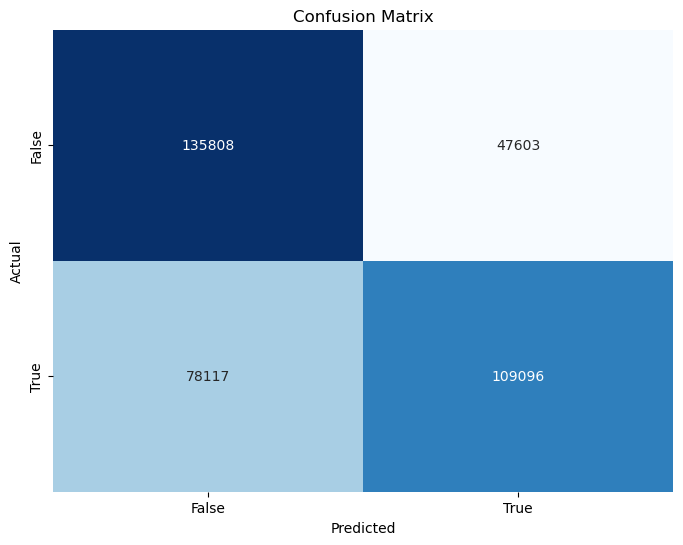

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Convert both y_val and y_val_pred to integers
y_val = y_val.astype(int)
y_val_pred = y_val_pred.astype(int)

# Calculate the accuracy score
print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))

# Display classification report and confusion matrix
print(classification_report(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model performs well with an accuracy of 66%, which is generally considered a strong baseline for binary classification problems. It is good at predicting 'False' instances (higher precision and recall for this class), while its performance on 'True' instances is slightly lower.

In [20]:

X_test = test_data.drop(columns=['SHOT_MADE'])

X_test = X_test[X_train.columns]

print(X_test)



        SEASON_1   GAME_ID  LOC_X      LOC_Y  SHOT_DISTANCE  QUARTER  \
0           2019  21800916  -1.60   9.124581       9.714127        4   
1           2009  20800286   2.40   7.850000       8.208684        1   
2           2006  20500085  -0.00  30.050000      30.050000        4   
3           2024  22300446  -1.00   6.250000       6.329494        1   
4           2020  21900019   1.84   7.495000       7.717553        4   
...          ...       ...    ...        ...            ...      ...   
846248      2019  21800354  -6.60  19.550000      20.634013        2   
846249      2014  21300893  -9.90  19.750000      22.092363        3   
846250      2023  22200449 -22.80   7.850000      24.113534        3   
846251      2023  22200012  -0.10  10.250000      10.250488        3   
846252      2016  21500562  10.40  22.650000      24.923533        1   

        MINS_LEFT  SECS_LEFT  AVG_SUCCESS_RATE  SHOT_ANGLE  ...  \
0               3         59          0.579351    1.580595  ...   
1

In [21]:
# Make predictions on the test dataset
y_test_pred = model.predict(X_test)
submission_df['SHOT_MADE'] = y_test_pred
submission_df.to_csv("../submission.csv", index=True, index_label="ID")
print("Predictions saved to submission.csv")



Predictions saved to submission.csv


<Figure size 1200x1000 with 0 Axes>

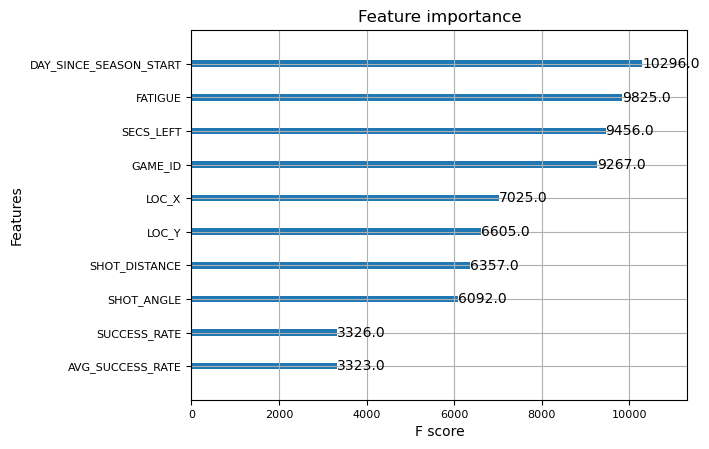

                               Feature  Importance
11              DAY_SINCE_SEASON_START     10296.0
10                             FATIGUE      9825.0
7                            SECS_LEFT      9456.0
1                              GAME_ID      9267.0
2                                LOC_X      7025.0
3                                LOC_Y      6605.0
4                        SHOT_DISTANCE      6357.0
9                           SHOT_ANGLE      6092.0
15                        SUCCESS_RATE      3326.0
5                              QUARTER      3323.0
8                     AVG_SUCCESS_RATE      3323.0
14                     SHOT_DIFFICULTY      3023.0
6                            MINS_LEFT      2931.0
0                             SEASON_1      2679.0
13             POSITION_ZONE_ADVANTAGE      2107.0
12                      HOME_ADVANTAGE      1185.0
1227            ACTION_TYPE_Layup Shot       583.0
1210    ACTION_TYPE_Driving Layup Shot       557.0
1226             ACTION_TYPE_Ju

In [22]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Set the figure size to make the plot bigger
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

# Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)  # Plot top 10 features

# Adjust the size of the labels to make them smaller
plt.xticks(fontsize=8)  # Adjust this value to make labels smaller or bigger
plt.yticks(fontsize=8)  # Adjust this value to make labels smaller or bigger

# Show the plot
plt.show()

# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a pandas DataFrame for better visualization
importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(importance_df.head(20))  # You can adjust the number to display more or fewer features


#### Creating the submission file. 



You should follow the format of `submission.csv` (also provided):

```{python}
submission_df = pd.read_csv("./submission.csv", index_col=0)
submission_df['SHOT_MADE'] = # your predictions
submission_df.to_csv("./submission.csv", index=True, index_label="ID")
```

Then upload the file to the Kaggle competition to get your leaderboard score. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 4: Optional (Bonus) Advanced visualizations and analysis


This is an optional problem worth 5 bonus points. It is an open-ended question. We are asking you to create a single novel and possibly interactive visualization
that shows an interesting insight into the data. Some examples could be:

- a shot heatmap for players or teams,
- game-winning (or tying) clutch shot analysis
- career makes from a particular player shown on a court graphic
- progression of shots from a particular player (or players at a particular position) over time

However you are free to design this yourself. Earning the bonus should be beyond the scope of a simple EDA and should involve a few steps of analysis prior to the visualization. 

Your plots should be on a professional level visually. This means they should have proper labels, titles, legends, and the font sizes should make the visualization clear.

Since this part is more open-ended than the others, it is optional. 

In [95]:
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('../datasets/train.csv')

player_name = 'LeBron James'  
df_player = df[df['PLAYER_NAME'] == player_name]
df_player['GAME_DATE'] = pd.to_datetime(df_player['GAME_DATE'])

df_player = df_player.dropna(subset=['GAME_DATE'])
df_player = df_player.dropna(subset=['SHOT_DISTANCE'])
df_player['YEAR'] = df_player['GAME_DATE'].dt.year
df_player = df_player.dropna(subset=['YEAR'])
df_player = df_player.sort_values('GAME_DATE')

frames = []

made_shot_color = 'forestgreen'
missed_shot_color = 'darkviolet'
made_marker = 'circle'
missed_marker = 'triangle-up'

#frames for each year
for year in df_player['YEAR'].unique():
    year_data = df_player[df_player['YEAR'] == year]
    
    #calculate success rate and average distance for successful shots
    total_shots = len(year_data)
    successful_shots = year_data[year_data['SHOT_MADE'] == 1]
    success_rate = len(successful_shots) / total_shots if total_shots > 0 else 0
    avg_distance = successful_shots['SHOT_DISTANCE'].mean() if len(successful_shots) > 0 else 0
    
    frame = go.Frame(
        data=[
            go.Scatter(
                x=year_data['LOC_X'],
                y=year_data['LOC_Y'],
                mode='markers',
                marker=dict(
                    color=year_data['SHOT_MADE'].apply(lambda x: made_shot_color if x == 1 else missed_shot_color),
                    size=12,
                    opacity=0.8,
                    symbol=year_data['SHOT_MADE'].apply(lambda x: made_marker if x == 1 else missed_marker)
                ),
                text=year_data['GAME_DATE'].astype(str),
                hoverinfo='text'
            )
        ],
        name=str(year),
        layout=dict(
            annotations=[dict(
                x=0.5, y=1.05,
                xref='paper', yref='paper',
                text=f'Year: {year}<br>Success Rate: {success_rate*100:.2f}%<br>Avg Distance for Successful Shots: {avg_distance:.2f} ft',
                showarrow=False,
                font=dict(size=18, color='black')
            )]
        )
    )
    frames.append(frame)

initial_data = df_player[df_player['YEAR'] == df_player['YEAR'].min()]
trace = go.Scatter(
    x=initial_data['LOC_X'],
    y=initial_data['LOC_Y'],
    mode='markers',
    marker=dict(
        color=initial_data['SHOT_MADE'].apply(lambda x: made_shot_color if x == 1 else missed_shot_color),
        size=12,
        opacity=0.8,
        symbol=initial_data['SHOT_MADE'].apply(lambda x: made_marker if x == 1 else missed_marker)
    ),
    text=initial_data['GAME_DATE'].astype(str),
    hoverinfo='text'
)

#layout with animation controls and court styling
layout = go.Layout(
    title=f"Shot Progression for {player_name}",
    xaxis=dict(
        range=[-50, 50],  # X-axis limits for basketball court
        title="Court Width",
    ),
    yaxis=dict(
        range=[-50, 100],  # Y-axis limits for basketball court
        title="Court Height",
    ),
    showlegend=True,
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=14),
        title='Shot Status',
    ),
    plot_bgcolor='lavenderblush', 
    titlefont=dict(size=24),
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }],
)


fig = go.Figure(data=[trace], layout=layout, frames=frames)

fig.show()


/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_66586/3984252044.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_66586/339811350.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  made_shots['scaled_LOC_X'] = made_shots['LOC_X'] * 250 / max_x
/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_66586/339811350.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  made_shots['scaled_LOC_Y'] = made_shots['LOC_Y'] * 470 / max_y
/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_66586/339811350.py:60: SettingWithCopyWarning: 
A value is trying to be

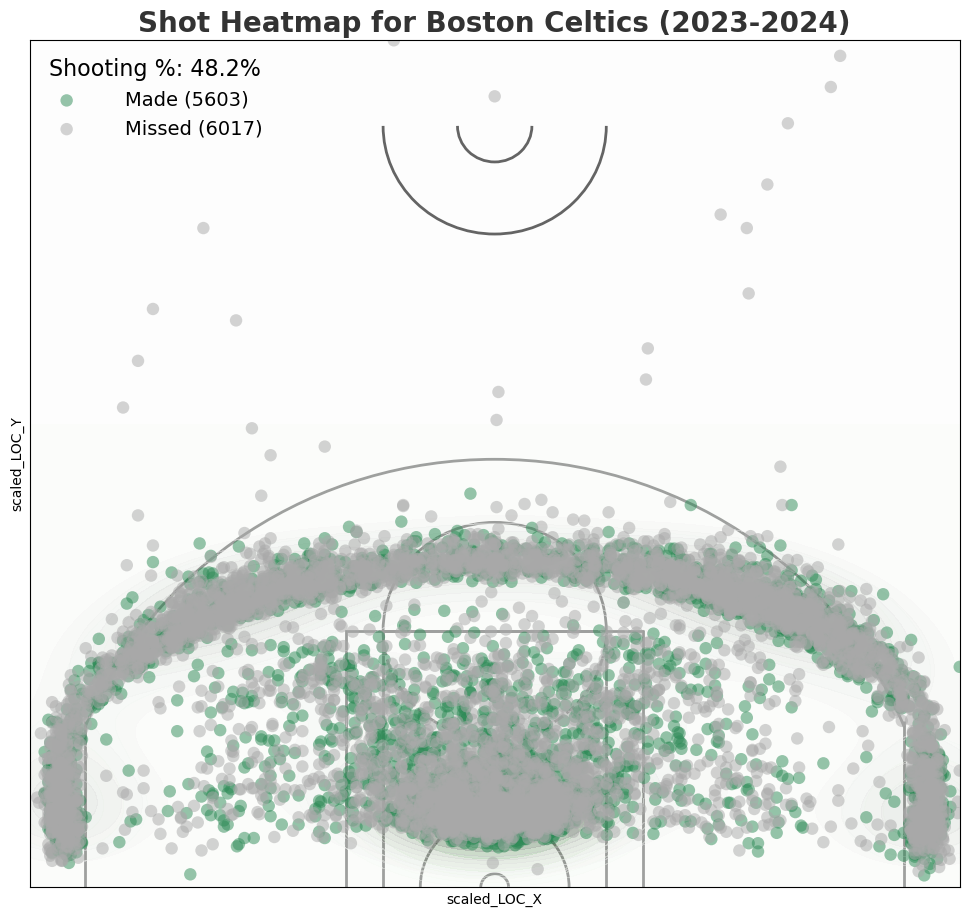

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc,
                      center_outer_arc, center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

df = pd.read_csv('../datasets/train.csv')

#filter for Boston Celtics and season 2023-2024
boston_celtics_data = df[df['TEAM_NAME'] == 'Boston Celtics']
boston_celtics_data = boston_celtics_data[boston_celtics_data['SEASON_1'].between(2023, 2024)]

#separate made and missed shots
made_shots = boston_celtics_data[boston_celtics_data['SHOT_MADE'] == 1]
missed_shots = boston_celtics_data[boston_celtics_data['SHOT_MADE'] == 0]

#calculate shooting statistics
total_made = len(made_shots)
total_missed = len(missed_shots)
total_shots = total_made + total_missed
shooting_percentage = (total_made / total_shots) * 100 if total_shots > 0 else 0

#scale shot locations
max_x = boston_celtics_data['LOC_X'].abs().max()
max_y = boston_celtics_data['LOC_Y'].abs().max()

made_shots['scaled_LOC_X'] = made_shots['LOC_X'] * 250 / max_x
made_shots['scaled_LOC_Y'] = made_shots['LOC_Y'] * 470 / max_y
missed_shots['scaled_LOC_X'] = missed_shots['LOC_X'] * 250 / max_x
missed_shots['scaled_LOC_Y'] = missed_shots['LOC_Y'] * 470 / max_y


fig, ax = plt.subplots(figsize=(12, 11))
draw_court(ax=ax, color='black', lw=2)

sns.kdeplot(data=made_shots, x='scaled_LOC_X', y='scaled_LOC_Y', cmap="Greens", fill=True, thresh=0, alpha=0.4, ax=ax)
sns.kdeplot(data=missed_shots, x='scaled_LOC_X', y='scaled_LOC_Y', cmap="Greys", fill=True, thresh=0, alpha=0.4, ax=ax)

ax.scatter(made_shots['scaled_LOC_X'], made_shots['scaled_LOC_Y'], color='#2E8B57', label=f'Made ({total_made})', alpha=0.5, edgecolors='none', s=80)
ax.scatter(missed_shots['scaled_LOC_X'], missed_shots['scaled_LOC_Y'], color='#A9A9A9', label=f'Missed ({total_missed})', alpha=0.5, edgecolors='none', s=80)

ax.set_title('Shot Heatmap for Boston Celtics (2023-2024)', fontsize=20, fontweight='bold', color='#333333')

ax.legend(
    loc='upper left',
    fontsize=14,
    title=f"Shooting %: {shooting_percentage:.1f}%",
    title_fontsize=16,
    frameon=False,  
    handletextpad=2  
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [71]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [77]:
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('../datasets/train.csv')

player_name = 'LeBron James'
df_player = df[df['PLAYER_NAME'] == player_name]

df_player['GAME_DATE'] = pd.to_datetime(df_player['GAME_DATE'])

df_player = df_player.dropna(subset=['GAME_DATE'])

df_player['YEAR'] = df_player['GAME_DATE'].dt.year
df_player = df_player.dropna(subset=['YEAR'])

df_player = df_player.sort_values('GAME_DATE')

trace = go.Scatter(
    x=df_player['LOC_X'],  # X-coordinate for shot locations
    y=df_player['LOC_Y'],  # Y-coordinate for shot locations
    mode='markers',
    marker=dict(
        color=df_player['YEAR'],  # Color based on the year
        colorscale='Viridis',  # Color scale for the years
        size=12,  # Marker size
        opacity=0.8,
        colorbar=dict(title="Year", tickvals=[df_player['YEAR'].min(), df_player['YEAR'].max()])
    ),
    text=df_player['GAME_DATE'].astype(str),  # Show game date as hover text
    hoverinfo='text',  # Display game date on hover
)

layout = go.Layout(
    title=f"Shot Progression for {player_name}",
    xaxis=dict(
        range=[-250, 250],  
        title="Court Width",
        showgrid=False, 
    ),
    yaxis=dict(
        range=[-50, 470],  
        title="Court Height",
        showgrid=False,  
    ),
    showlegend=False,  
    plot_bgcolor='white', 
    titlefont=dict(size=24),  
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()



/var/folders/44/36wxfd3s6kl5t4k26k5pyhk80000gn/T/ipykernel_66586/3608915745.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This analysis suggests the player has shown consistent improvement in shooting accuracy and range over the years, with certain fluctuations likely tied to changes in play style or external circumstances

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)